In [11]:
# Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
import matplotlib.pyplot as plt
import seaborn as sns


warnings.filterwarnings("ignore")


In [2]:
# Load Datasets
def load_data():
    # Load the datasets with correct file names
    crop_data = pd.read_csv("Crop_recommendation.csv")  # ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']
    fertilizer_data = pd.read_csv("Fertilizer_Prediction.csv")  # ['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type', 'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name']
    return crop_data, fertilizer_data

crop_data, fertilizer_data = load_data()

print("Crop Recommendation Data Sample:")
print(crop_data.head())
print("\nFertilizer Prediction Data Sample:")
print(fertilizer_data.head())


Crop Recommendation Data Sample:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

Fertilizer Prediction Data Sample:
   Temparature  Humidity   Moisture Soil Type  Crop Type  Nitrogen  Potassium  \
0           26         52        38     Sandy      Maize        37          0   
1           29         52        45     Loamy  Sugarcane        12          0   
2           34         65        62     Black     Cotton         7          9   
3           32         62        34       Red    Tobacco        22          0   
4           28         54        46    Clayey      Paddy        35          0   

   Phosphorous Fertilizer Name  
0            0 

In [3]:
# Preprocess Data for Crop Recommendation
def preprocess_crop_data(crop_data):
    X = crop_data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]  # Features
    y = crop_data['label']  # Target variable (crop label)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = preprocess_crop_data(crop_data)


In [4]:
# Train the Crop Recommendation Model
def train_crop_model(X_train, y_train):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    return model

crop_model = train_crop_model(X_train, y_train)


In [5]:
# Evaluate the Crop Recommendation Model
def evaluate_crop_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

accuracy = evaluate_crop_model(crop_model, X_test, y_test)
print(f"Crop Recommendation Model Accuracy: {accuracy * 100:.2f}%")


Crop Recommendation Model Accuracy: 99.32%


In [6]:
# Predict Crop Recommendation
def predict_crop(model, features):
    prediction = model.predict([features])
    return prediction[0]

# Example Prediction
features = [90, 42, 43, 20.87, 82.00, 6.50, 202.00]  # Example input
predicted_crop = predict_crop(crop_model, features)
print(f"Predicted Crop: {predicted_crop}")


Predicted Crop: rice


In [10]:
# Recommend Fertilizer
def recommend_fertilizer(fertilizer_data, crop, soil_n, soil_p, soil_k):
    # Normalize column names for consistency
    fertilizer_data.columns = [col.lower().replace(" ", "_") for col in fertilizer_data.columns]

    # Filter for the specific crop type
    crop_data = fertilizer_data[fertilizer_data['crop_type'] == crop]
    if crop_data.empty:
        return "No fertilizer recommendation available for this crop."
    
    # Calculate nutrient differences
    crop_data['n_diff'] = crop_data['nitrogen'].apply(lambda x: max(0, x - soil_n))
    crop_data['p_diff'] = crop_data['phosphorous'].apply(lambda x: max(0, x - soil_p))
    crop_data['k_diff'] = crop_data['potassium'].apply(lambda x: max(0, x - soil_k))
    recommended = crop_data.loc[crop_data[['n_diff', 'p_diff', 'k_diff']].sum(axis=1).idxmin()]
    return recommended['fertilizer_name']

# Example Test with Wheat
recommended_fertilizer = recommend_fertilizer(fertilizer_data, "Wheat", 75, 30, 35)
print(f"Recommended Fertilizer for Wheat: {recommended_fertilizer}")

Recommended Fertilizer for Wheat: Urea


In [8]:
# Save the Crop Model
import joblib

joblib.dump(crop_model, "crop_recommendation_model.pkl")
print("Crop Recommendation Model saved successfully.")


Crop Recommendation Model saved successfully.


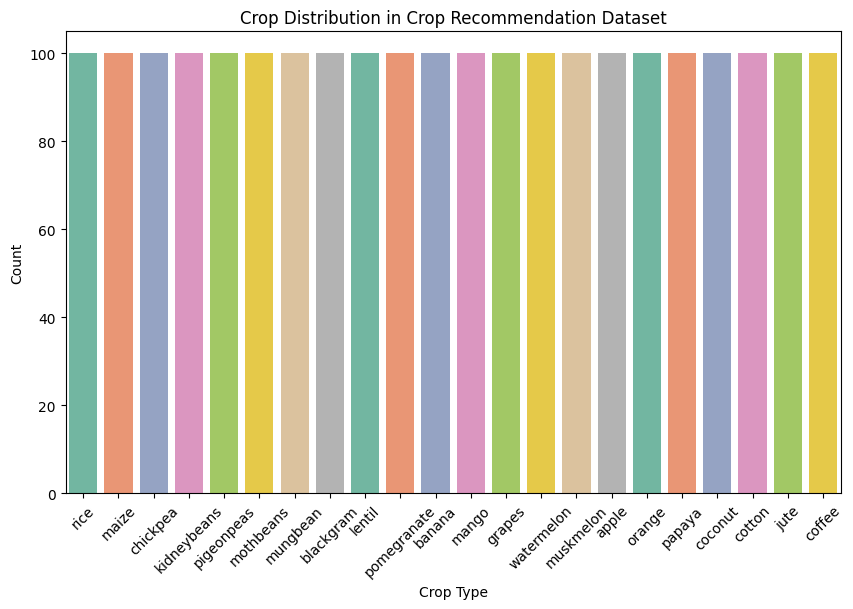

In [12]:
# Plot Distribution of Crop Labels (from Crop_recommendation dataset)
def plot_crop_distribution(crop_data):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=crop_data, x='label', palette='Set2')
    plt.title("Crop Distribution in Crop Recommendation Dataset")
    plt.xlabel("Crop Type")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

plot_crop_distribution(crop_data)


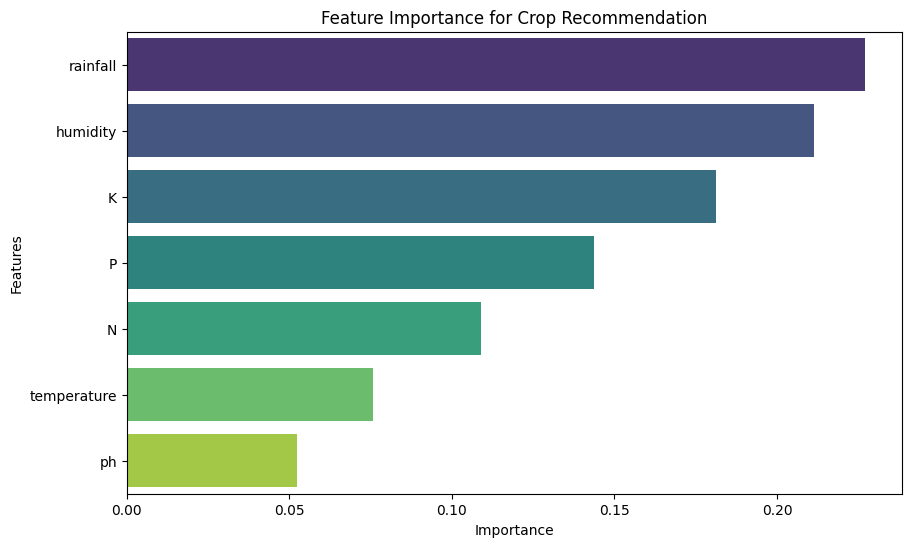

In [13]:
# Plot Feature Importance for Crop Recommendation (using Random Forest)
def plot_feature_importance(model, X):
    # Get feature importance from the trained model
    importances = model.feature_importances_
    feature_names = X.columns
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances[indices], y=feature_names[indices], palette='viridis')
    plt.title("Feature Importance for Crop Recommendation")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

plot_feature_importance(crop_model, X_train)


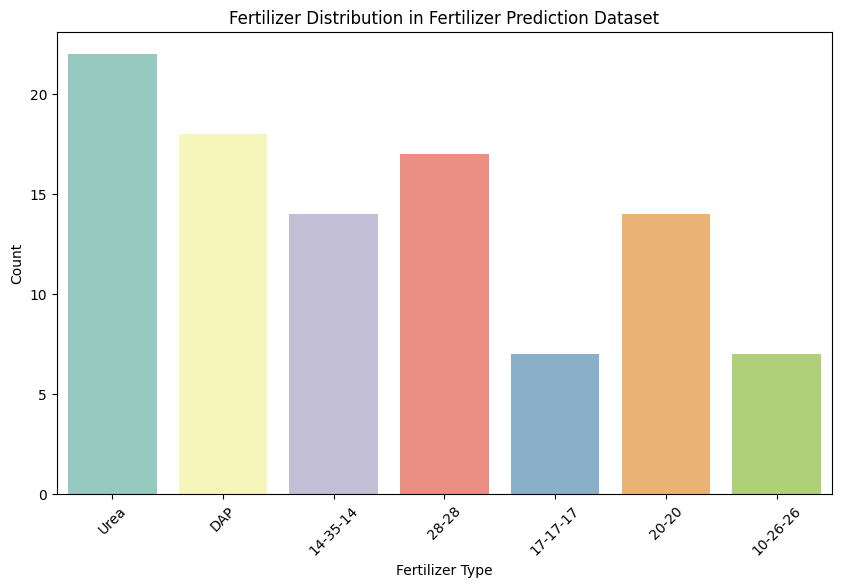

In [14]:
# Plot Fertilizer Distribution (from Fertilizer_Prediction dataset)
def plot_fertilizer_distribution(fertilizer_data):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=fertilizer_data, x='fertilizer_name', palette='Set3')
    plt.title("Fertilizer Distribution in Fertilizer Prediction Dataset")
    plt.xlabel("Fertilizer Type")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

plot_fertilizer_distribution(fertilizer_data)


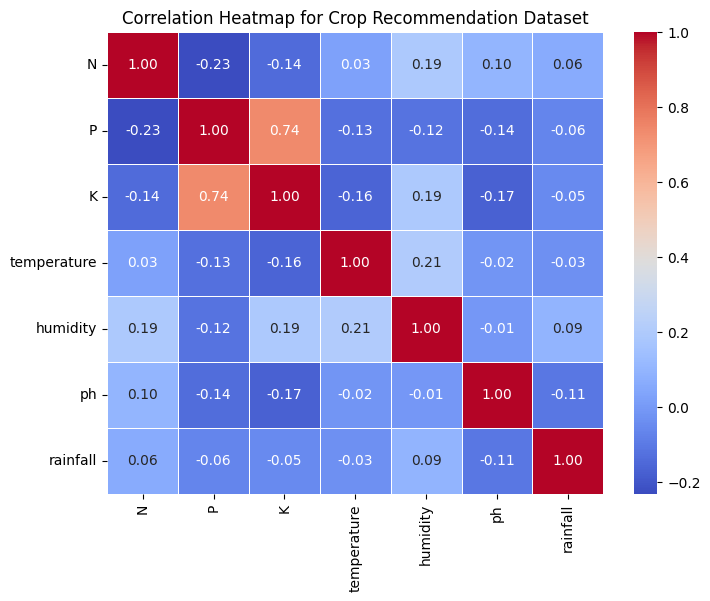

In [15]:
# Plot Correlation Heatmap for Crop Recommendation Dataset
def plot_correlation_heatmap(crop_data):
    correlation_matrix = crop_data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title("Correlation Heatmap for Crop Recommendation Dataset")
    plt.show()

plot_correlation_heatmap(crop_data)
